# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create two new dataframes

north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

In [2]:
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [3]:
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [4]:
#Code Used:
north_df['Rep ID'].unique()

##There are 9 reps at in the north Branch
  ##Brent, Cam, Todd, Duke, Joe, Lilly, Amanda, Andy, Xander

array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

#### EDA Question 1B:  How many reps are in the South branch?  

In [5]:
#Code Used:
south_df['Rep ID'].unique()

##There are 11 reps at in the north Branch
  ##Kate, Eric, Susan, Alice, Sandy, Karl, Randy, George, Helga, Josh, Sharon 

array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [6]:
north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [7]:
#Code Used:
cols = ['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time','During Call Wait Time']
print("North Branch Average: Busy Mins, Not Ready Mins, Incoming Wait Time, During Call Wait Time")
north_df[cols].agg('mean')

North Branch Average: Busy Mins, Not Ready Mins, Incoming Wait Time, During Call Wait Time


Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [8]:
#Code Used:
cols = ['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time','During Call Wait Time']
print("South Branch Average: Busy Mins, Not Ready Mins, Incoming Wait Time, During Call Wait Time")
south_df[cols].agg('mean')

South Branch Average: Busy Mins, Not Ready Mins, Incoming Wait Time, During Call Wait Time


Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
# Code Used:
print('North')
print(north_df[['Time Block','Calls']].groupby('Time Block').count())
print('\n' + 'South')
print(south_df[['Time Block','Calls']].groupby('Time Block').count())


North
            Calls
Time Block       
10:00 AM       43
11:00 AM       25
12:00 PM       45
1:00 PM        17
2:00 PM        35
3:00 PM        30
4:00 PM        28
5:00 PM        17
9:00 AM         5

South
            Calls
Time Block       
10:00 AM       56
11:00 AM       31
12:00 PM       75
1:00 PM        23
2:00 PM        30
3:00 PM        43
4:00 PM        25
5:00 PM        26
9:00 AM         5


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 

AxesSubplot(0.125,0.11;0.62x0.77)


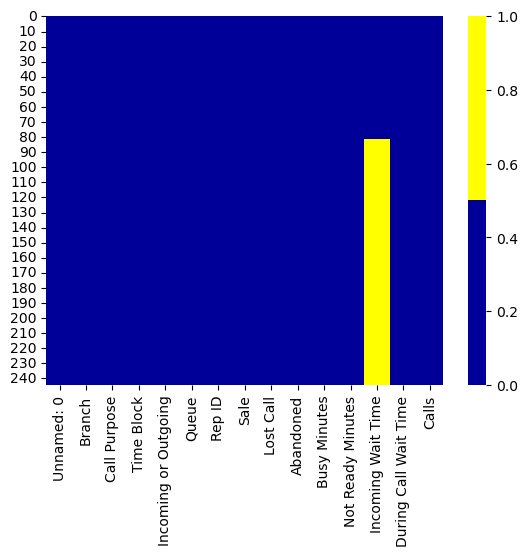

In [10]:
# Code Used
# Add Additional Cells as needed.
# Plot a heatmap of any missing data
cols = north_df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
print(sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours)))


AxesSubplot(0.125,0.11;0.62x0.77)


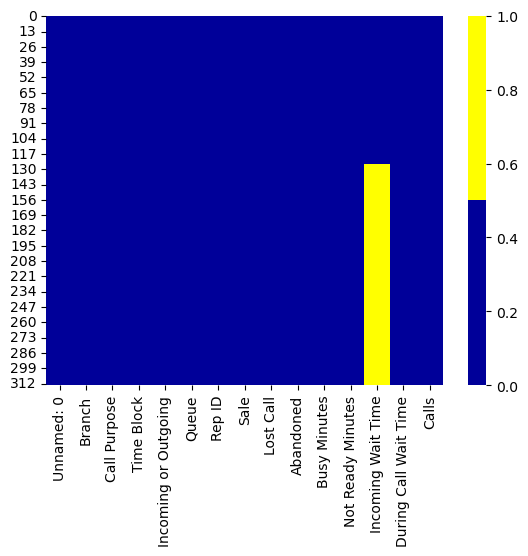

In [11]:
print(sns.heatmap(south_df[cols].isnull(), cmap=sns.color_palette(colours)))


In [12]:
# Try out a missing data percentage list! 

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [13]:
# Try out a missing data percentage list! 

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [14]:
north_df['Incoming Wait Time'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [15]:
south_df['Incoming Wait Time'].unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

I WILL CLEAN THE DATA BY CHANGING THE NULL VALUES TO ZERO. 

In [16]:
north_df2 = north_df
north_df2['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(0)
north_df2['Incoming Wait Time'].unique()

array([1., 2., 3., 4., 5., 0.])

In [17]:
south_df2 = south_df
south_df2['Incoming Wait Time'] = south_df['Incoming Wait Time'].fillna(0)
south_df2['Incoming Wait Time'].unique()

array([1., 2., 3., 4., 5., 0.])

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I think 'YES ' and 'YES' are both equivalent answers and I will change all of the entries with spaces to have entries with no spaces

In [18]:
north_df2['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [19]:
south_df2['Sale'].value_counts()

NO     308
YES      6
Name: Sale, dtype: int64

In [20]:
#Code Used
# Add Additional Cells as needed.

north_df2['Sale'].replace(to_replace='YES ', value='YES', inplace= True)
north_df2['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicates for both sets

In [21]:
#Code Used
# Add Additional Cells as needed.
north_df2.duplicated().value_counts()


False    245
dtype: int64

In [22]:
#Code Used
# Add Additional Cells as needed.
south_df2.duplicated().value_counts()


False    314
dtype: int64

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: One column that may seem unneccesary is the Branch column. It will always say North for the north_df and South for the south_df. However this may be important to keep if we ever want to merge both datasets 

> The column 'Calls' is unnecessary because its just a tally for each record in our dataframe. If we want to know the total calls we can just use counts() or value_counts(). I can drop this column

In [23]:
south_df2['Calls'].unique()

array([1], dtype=int64)

In [24]:
#Code Used
# Add Additional Cells as needed.

##north_df3 = north_df2.drop(columns='Calls')
##south_df3 = south_df2.drop(columns='Calls')

##print(north_df3.columns)
##print(south_df3.columns)

##DECIDED NOT TO DROP 'Calls' AS THIS COLUMN WOULD BE IMPORTANT AND NEEDED 
##FOR THE VIAUALIZATIONS PART OF THIS ASSIGNMENT

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [25]:
# Create dataframe for the entire company named df
frames = [north_df2, south_df2]
df = pd.concat(frames, ignore_index=True)
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent
- South Branch = Eric


In [26]:
# Code Used
# Add Additional Cells as needed.
df.groupby(['Branch','Rep ID']).agg({'Rep ID':'count'})

Rep ID
Branch Rep ID        
North  Amanda      23
       Andy        23
       Brent       37
       Cam         24
       Duke        29
       Joe         26
       Lilly       30
       Todd        29
       Xander      24
South  Alice       20
       Eric        35
       George      29
       Helga       31
       Josh        26
       Karl        28
       Kate        29
       Randy       33
       Sandy       32
       Sharon      25
       Susan       26

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
>South Branch and Company Wide abandoment rate falls below optimal range which is good! This means less calls were abandoned by customers. North falls with in range which is also good.

In [27]:
# Code Used
# Add Additional Cells as needed.
df.groupby(['Branch',]).agg({'Abandoned':'mean'})

,Abandoned
Branch,
North,0.028571
South,0.012739


In [28]:
df['Abandoned'].mean()

0.01967799642218247

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 80.00%
- South Branch = 75.15%
- Company Wide = 77.28%

In [29]:
df.loc[df['Incoming Wait Time'] <= 2, 'Calls less than 2 seconds'] = 1
df.loc[df['Incoming Wait Time'] > 2, 'Calls less than 2 seconds'] = 0
df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Calls less than 2 seconds
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,1.0
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,1.0
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,1.0
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1,1.0
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1,1.0


In [30]:
print(df.groupby(['Branch',]).agg({'Calls less than 2 seconds':'mean'}))
print('\n')
print('Entire Branch avg Call less than 2 seconds')
print(df.agg({'Calls less than 2 seconds':'mean'}))

        Calls less than 2 seconds
Branch                           
North                    0.800000
South                    0.751592


Entire Branch avg Call less than 2 seconds
Calls less than 2 seconds    0.772809
dtype: float64


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.02
- South Branch in seconds = 1.20
- Company Wide in seconds = 1.12


In [31]:
# Code Used
# Add Additional Cells as needed.
df.groupby(['Branch',]).agg({'Incoming Wait Time':'mean'})

,Incoming Wait Time
Branch,
North,1.020408
South,1.203822


In [32]:
# Code Used
# Add Additional Cells as needed.
df.agg({'Incoming Wait Time':'mean'})

Incoming Wait Time    1.123435
dtype: float64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose the Bar Chart style because we are comparing the different Queues and how their abandoment rates differ

In [33]:
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

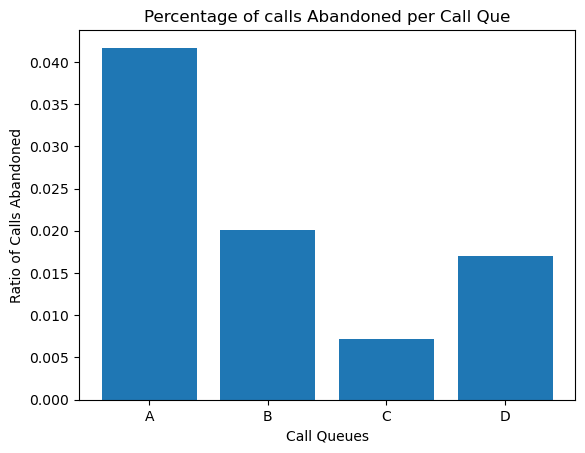

In [34]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:

#stating my x and y values 
x=list(abandonment_rates.keys())
y=list(abandonment_rates.values())

# Create bars
plt.bar(x,y)

plt.xlabel("Call Queues")
plt.ylabel("Ratio of Calls Abandoned")
plt.title("Percentage of calls Abandoned per Call Que")
plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> I chose the Bar Chart style because we making comparisons between the reps. I made two seperate charts, one comparing  Service Level Oercentage and the other comparing the Incoming Wait Time

In [35]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df2.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
total_calls_in2 = north_df2[north_df2["Incoming or Outgoing"] == "Incoming"]
quick_calls = total_calls_in2[total_calls_in2["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df2[north_df2["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level

# Code Used
# Add Additional Cells as needed.
wait_group = df.groupby(['Rep ID',]).agg({'Incoming Wait Time':'mean'})

merge_df = pd.merge(service_level, wait_group, on='Rep ID')

merge_df.rename(columns={'Incoming Wait Time':'Average Incoming Wait Time'}, inplace=True)
print('North Branch Service Level % AND Average Incoming Wait Time')
merge_df

North Branch Service Level % AND Average Incoming Wait Time


,Calls_x,Calls_y,Service Level %,Average Incoming Wait Time
Rep ID,,,,
Amanda,3,5,60.000000,0.521739
Andy,3,10,30.000000,1.565217
Brent,6,8,75.000000,0.459459
Cam,5,11,45.454545,1.333333
Duke,6,14,42.857143,1.344828
Joe,2,10,20.000000,1.384615
Lilly,4,12,33.333333,1.233333
Todd,2,6,33.333333,0.724138
Xander,2,6,33.333333,0.833333


In [36]:
# NORTH AND SOUTH BRANCH KPIS TOGETHER
# df_plt contains the data you need for the average speed of answer of each rep

df_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
total_calls_in_df = df[df["Incoming or Outgoing"] == "Incoming"]
quick_calls_df = total_calls_in_df[total_calls_in_df["Incoming Wait Time"] <= 2.0]
quick_reps_df = quick_calls_df[["Rep ID", "Calls","Branch"]]
quick_stats_df = quick_reps_df.groupby(["Branch"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in_df = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls_df = total_calls_in_df[["Rep ID", "Calls","Branch"]]     
total_stats_df = rep_calls_df.groupby(["Branch"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level_df = pd.merge(quick_stats_df, total_stats_df, on="Branch")

# Create Percentage Column in Table 3
service_level_df["Service Level %"] = service_level_df["Calls_x"]/service_level_df["Calls_y"] * 100

#Your Code Here:
# Code Used
# Add Additional Cells as needed.
wait_group_df = df.groupby(['Branch',]).agg({'Incoming Wait Time':'mean'})

merge_df2 = pd.merge(service_level_df, wait_group_df, on='Branch')
merge_df2

,Calls_x,Calls_y,Service Level %,Incoming Wait Time
Branch,,,,
North,33,82,40.243902,1.020408
South,48,126,38.095238,1.203822


In [37]:
merge_df.columns

Index(['Calls_x', 'Calls_y', 'Service Level %', 'Average Incoming Wait Time'], dtype='object')

Text(0.5, 1.0, 'SERVICE LEVEL PERCENTAGE PER CALL REP')

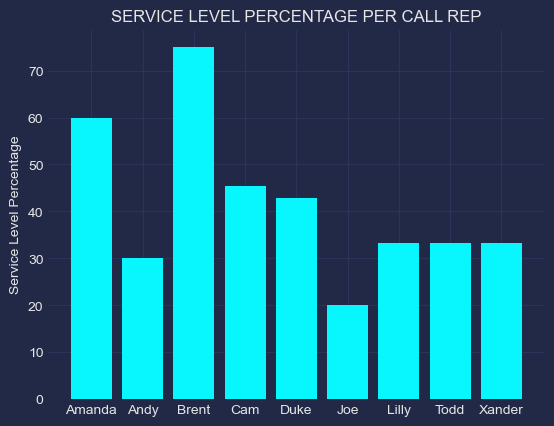

In [45]:
#Creating a Service Level % Dictionary
sl_df = merge_df.groupby("Rep ID").agg({"Service Level %":"sum"}) #Create a dictionary with rep ID's as the keys and service level as the values
sl_dict = sl_df.to_dict()
sl_dict1 = sl_dict["Service Level %"]

#Creating a averave Incoming Wait time dictionary
avg_IWT_df = merge_df.groupby("Rep ID").agg({"Average Incoming Wait Time":"sum"}) #Create a dictionary with rep ID's as the keys and Average Incoming Wait time as the values\
avg_IWT_dict = avg_IWT_df.to_dict()
avg_IWT_dict1 = avg_IWT_dict['Average Incoming Wait Time']

#Getting the x and y values for the two bar charts
Rep_ID_keys =sl_dict1.keys()  ##Make a list of the keys (Rep IDs) this will be our X VALUE
sl_dict_values =sl_dict1.values() ## Y VALUES FOR 1ST BAR CHART 
avg_IWT_values = avg_IWT_dict1.values() ## Y VALUES FOR 2ND BAR CHART

#Bar Chart for Service Level Percentage
plt.ylabel('Service Level Percentage')
plt.bar(Rep_ID_keys,sl_dict_values)
plt.title('SERVICE LEVEL PERCENTAGE PER CALL REP')


In [39]:
pip install mplcyberpunk

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'AVERAGE INCOMING WAIT TIME PER CALL REP')

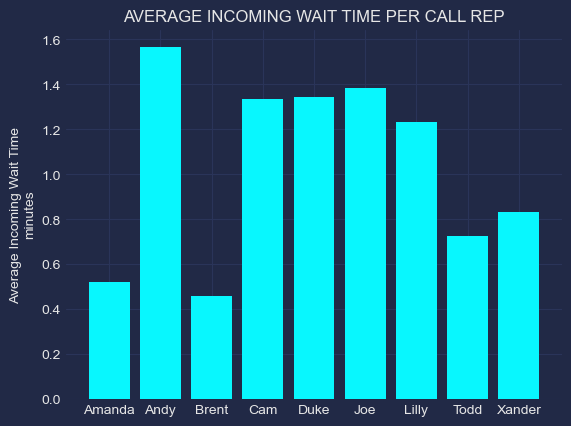

In [46]:
import mplcyberpunk
plt.style.use('cyberpunk')

#Bar Chart for Average Incoming Wait Time
plt.ylabel('Average Incoming Wait Time\nminutes')
plt.bar(Rep_ID_keys,avg_IWT_values)
plt.title("AVERAGE INCOMING WAIT TIME PER CALL REP")

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used a Pie Chart so that we can see how incoming and outgoing calls are distributed by comparing each purpose group to the whole

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


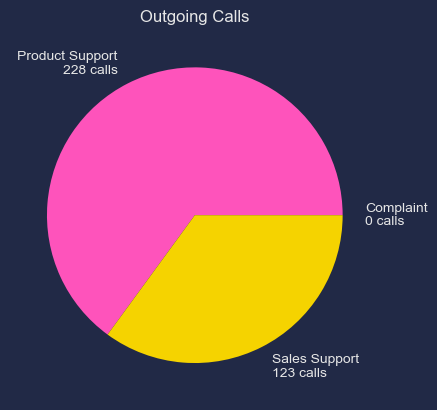

In [41]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
complaints['Outgoing']=0
complaints

#Creating a list of Outgoing calls grouped by purpose 
out_comp=complaints['Outgoing']
out_ss = sales_support['Outgoing']
out_ps = product_support['Outgoing']
outgoing_list = [out_comp,out_ps,out_ss]
outgoing_list

#Outgoing Pie Chart
plt.title('Outgoing Calls')
plt.pie(outgoing_list, labels=['Complaint\n0 calls','Product Support\n228 calls', 'Sales Support\n123 calls'], labeldistance=1.15);


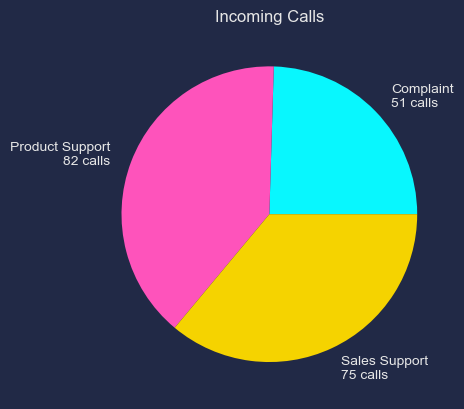

In [42]:
#Creating a list of Incoming calls grouped by purpose 
in_comp=complaints['Incoming']
in_ss = sales_support['Incoming']
in_ps = product_support['Incoming']
incoming_list = [in_comp,in_ps,in_ss]

plt.title('Incoming Calls')
plt.pie(incoming_list, labels=['Complaint\n51 calls','Product Support\n82 calls', 'Sales Support\n75 calls'], labeldistance=1.15);


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 

>>For Average Abandoment Rate the South Branch is performing more optimally

>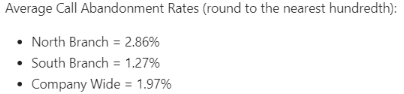

>>For Service Level % the North Branch is performing more optimally

>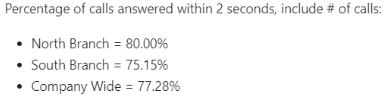

>>For Average Speed of Answer the North Branch is performing more optimally

>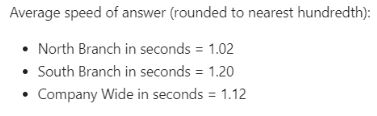

>>According to these  KPIs, overall the North Branch is operating more efficiently. They are taking more calls and answering with faster speeds (0.18sec difference). They have a higher abandoment rate (2.86%) than the South Branch(1.27%) but this percentage is still within the Company Wide Optimal range of 2-5%.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: Considering the South Branch has more reps(11) than the North(9) and their speeds are slower I would say they would benefit the most from having extra help


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Maybe a little more information about the differnt departments(Sales, Product etc)


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [43]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: